# **MNIST classification with TensorFlow model**

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os, sys

workdir_path = '/content/drive/My Drive/ICA/01_MNIST_tensorflow'
os.chdir(workdir_path)
sys.path.append(workdir_path)

In [58]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt     # only to show the images at end
from numpy.random import randint    # only to generate a random nuymber ar end
from numpy import argmax
import numpy as np


tf.reset_default_graph()

# load the data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [59]:
tf.reset_default_graph()

sess=tf.Session()    
#First let's load meta graph and restore weights
saver = tf.train.import_meta_graph('tensorflowcheckpoint.ckpt.meta')
saver.restore(sess,tf.train.latest_checkpoint('./'))

INFO:tensorflow:Restoring parameters from ./tensorflowcheckpoint.ckpt


In [0]:
graph = tf.get_default_graph()
input_node = graph.get_tensor_by_name('x_1:0')
input_2 = graph.get_tensor_by_name('keep_prob:0')
output_node = graph.get_tensor_by_name('Softmax:0')

8445
prediction:  5
real value:  5


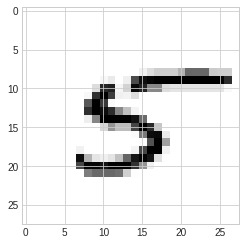

In [61]:
i=randint(1, mnist.test.images.shape[0])
print(i)
plt.imshow(mnist.test.images[i].reshape((28,28)), cmap='Greys')    #  cmap='Greys' to show as greyscale
print("prediction: ", argmax(sess.run('Softmax:0', feed_dict={'x_1:0': mnist.test.images[i:i+1], 'keep_prob:0': 1.0})))
print("real value: ", argmax(mnist.test.labels[i:i+1]))

In [0]:
runs=100

In [63]:
times_model=np.zeros((7,3))

batchs=[4, 8, 16, 32, 64, 128, 256]
for i, batchnum in enumerate(batchs):
  start_time_one_batch=time.time()
  for x in range(runs):
    sess.run(output_node, feed_dict={input_node: mnist.test.images[0:batchnum], input_2: 1.0})
  end_time_one_batch=time.time()
  times_model[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_model[i,1]=times_model[i,1]/(batchnum)
  times_model[i,2]=1/((times_model[i,1])/1000)
  print('ready for batch of',batchnum ,'!!!')


# # to plot***********************************************
# x1=[0, 1, 2, 3, 4, 5, 6]
# x2=[0, 1, 2, 3, 4, 5, 6]
# plt.style.use('seaborn-whitegrid')

# plt.plot(x1, times_model[:,0], marker='o')
# plt.ylabel('Average time [ms] for batch')
# plt.xlabel('Batch size')
# my_xticks = ['4', '8', '16', '32', '64', '128', '256']
# plt.xticks(x1, my_xticks)

# plt.figure()
# plt.plot(x2, times_model[:,1], marker='o')
# plt.ylabel('Average time/barch size [ms]')
# plt.xlabel('Batch size')
# plt.xticks(x2, my_xticks)

# for i in range(7):
#   print('Average time [ms] for batch of',2**(i+2) ,' : ',times_model[i,0])

# print('')

# for i in range(7):
#   print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_model[i,1])

ready for batch of 4 !!!
ready for batch of 8 !!!
ready for batch of 16 !!!
ready for batch of 32 !!!
ready for batch of 64 !!!
ready for batch of 128 !!!
ready for batch of 256 !!!


In [64]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,0], times_model[1,0], times_model[2,0], times_model[3,0], times_model[4,0], times_model[5,0], times_model[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,1], times_model[1,1], times_model[2,1], times_model[3,1], times_model[4,1], times_model[5,1], times_model[6,1]))

 | 1.3494 | 1.2892 | 1.3150 | 1.5036 | 2.0332 | 2.8366 | 4.3479

 | 0.3373 | 0.1611 | 0.0822 | 0.0470 | 0.0318 | 0.0222 | 0.0170


frozen

In [0]:
def load_graph(frozen_graph_filename):
    # We load the protobuf file from the disk and parse it to retrieve the 
    # unserialized graph_def
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # Then, we import the graph_def into a new Graph and returns it 
    with tf.Graph().as_default() as graph:
        # The name var will prefix every op/nodes in your graph
        # Since we load everything in a new graph, this is not needed
        tf.import_graph_def(graph_def, name="prefix")
    return graph

In [0]:
tf.reset_default_graph()

# We use our "load_graph" function
graph = load_graph('tensorflowModel_graph_frozen.pb')

with graph.as_default():
  # We access the input and output nodes 
  input_node = graph.get_tensor_by_name('prefix/x_1:0')
  input_2 = graph.get_tensor_by_name('prefix/keep_prob:0')
  output_node = graph.get_tensor_by_name('prefix/Softmax:0')
      

In [67]:
# We launch a Session
sess = tf.Session(graph=graph)

times_frozen=np.zeros((7,3))
batchs=[4, 8, 16, 32, 64, 128, 256]
for i, batchnum in enumerate(batchs):
  start_time_one_batch=time.time()
  for x in range(runs):
    sess.run(output_node, feed_dict={input_node: mnist.test.images[0:batchnum], input_2: 1.0})
  end_time_one_batch=time.time()
  times_frozen[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_frozen[i,1]=times_frozen[i,1]/(batchnum)
  times_frozen[i,2]=1/((times_frozen[i,1])/1000)
  print('ready for batch of',batchnum ,'!!!')


# # to plot***********************************************
# x3=[0, 1, 2, 3, 4, 5, 6]
# x4=[0, 1, 2, 3, 4, 5, 6]
# plt.style.use('seaborn-whitegrid')

# plt.plot(x3, times_frozen[:,0], marker='o')
# plt.ylabel('Average time [ms] for batch')
# plt.xlabel('Batch size')
# my_xticks = ['4', '8', '16', '32', '64', '128', '256']
# plt.xticks(x3, my_xticks)

# plt.figure()
# plt.plot(x4, times_frozen[:,1], marker='o')
# plt.ylabel('Average time/barch size [ms]')
# plt.xlabel('Batch size')
# plt.xticks(x4, my_xticks)

# for i in range(7):
#   print('Average time [ms] for batch of',2**(i+2) ,' : ',times_frozen[i,0])

# print('')

# for i in range(7):
#   print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_frozen[i,1])


ready for batch of 4 !!!
ready for batch of 8 !!!
ready for batch of 16 !!!
ready for batch of 32 !!!
ready for batch of 64 !!!
ready for batch of 128 !!!
ready for batch of 256 !!!


In [68]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,0], times_frozen[1,0], times_frozen[2,0], times_frozen[3,0], times_frozen[4,0], times_frozen[5,0], times_frozen[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,1], times_frozen[1,1], times_frozen[2,1], times_frozen[3,1], times_frozen[4,1], times_frozen[5,1], times_frozen[6,1]))

 | 2.0398 | 1.2760 | 1.3126 | 1.3820 | 1.9295 | 2.8656 | 4.4361

 | 0.5099 | 0.1595 | 0.0820 | 0.0432 | 0.0301 | 0.0224 | 0.0173


Optimized

In [0]:
tf.reset_default_graph()

# We use our "load_graph" function
graph = load_graph('tensorflowModel_graph_optimized.pb')

with graph.as_default():
  # We access the input and output nodes 
  input_node = graph.get_tensor_by_name('prefix/x_1:0')
  input_2 = graph.get_tensor_by_name('prefix/keep_prob:0')
  output_node = graph.get_tensor_by_name('prefix/Softmax:0')

In [70]:
# We launch a Session
sess = tf.Session(graph=graph)

times_optimized=np.zeros((7,3))

batchs=[4, 8, 16, 32, 64, 128, 256]
for i, batchnum in enumerate(batchs):
  start_time_one_batch=time.time()
  for x in range(runs):
    sess.run(output_node, feed_dict={input_node: mnist.test.images[0:batchnum], input_2: 1.0})
  end_time_one_batch=time.time()
  times_optimized[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_optimized[i,1]=times_optimized[i,1]/(batchnum)
  times_optimized[i,2]=1/((times_optimized[i,1])/1000)
  print('ready for batch of',batchnum ,'!!!')


# # to plot***********************************************
# x5=[0, 1, 2, 3, 4, 5, 6]
# x6=[0, 1, 2, 3, 4, 5, 6]
# plt.style.use('seaborn-whitegrid')

# plt.plot(x5, times_optimized[:,0], marker='o')
# plt.ylabel('Average time [ms] for batch')
# plt.xlabel('Batch size')
# my_xticks = ['4', '8', '16', '32', '64', '128', '256']
# plt.xticks(x5, my_xticks)

# plt.figure()
# plt.plot(x6, times_optimized[:,1], marker='o')
# plt.ylabel('Average time/barch size [ms]')
# plt.xlabel('Batch size')
# plt.xticks(x6, my_xticks)

# for i in range(7):
#   print('Average time [ms] for batch of',2**(i+2) ,' : ',times_optimized[i,0])

# print('')

# for i in range(7):
#   print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_optimized[i,1])


ready for batch of 4 !!!
ready for batch of 8 !!!
ready for batch of 16 !!!
ready for batch of 32 !!!
ready for batch of 64 !!!
ready for batch of 128 !!!
ready for batch of 256 !!!


In [71]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,0], times_optimized[1,0], times_optimized[2,0], times_optimized[3,0], times_optimized[4,0], times_optimized[5,0], times_optimized[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,1], times_optimized[1,1], times_optimized[2,1], times_optimized[3,1], times_optimized[4,1], times_optimized[5,1], times_optimized[6,1]))

 | 1.9527 | 1.1875 | 1.2331 | 1.3769 | 1.9259 | 2.7573 | 4.2981

 | 0.4882 | 0.1484 | 0.0771 | 0.0430 | 0.0301 | 0.0215 | 0.0168


Comparison

Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256
--- | --- | --- | --- | --- | --- | --- | --- 
Model | 1.3494 | 1.2892 | 1.3150 | 1.5036 | 2.0332 | 2.8366 | 4.3479
Frozen | 2.0398 | 1.2760 | 1.3126 | 1.3820 | 1.9295 | 2.8656 | 4.4361
Optimized | 1.9527 | 1.1875 | 1.2331 | 1.3769 | 1.9259 | 2.7573 | 4.2981


Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256
--- | --- | --- | --- | --- | --- | --- | --- 
Model | 0.3373 | 0.1611 | 0.0822 | 0.0470 | 0.0318 | 0.0222 | 0.0170
Frozen | 0.5099 | 0.1595 | 0.0820 | 0.0432 | 0.0301 | 0.0224 | 0.0173
Optimized | 0.4882 | 0.1484 | 0.0771 | 0.0430 | 0.0301 | 0.0215 | 0.0168


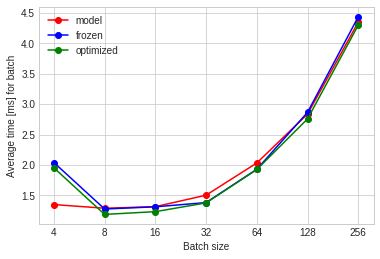

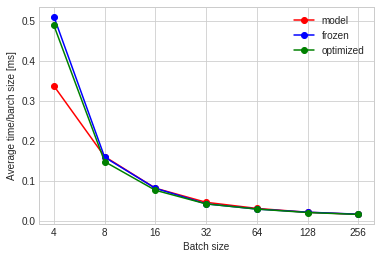

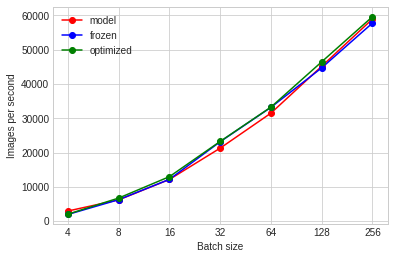

In [72]:
x1=[0, 1, 2, 3, 4, 5, 6]


plt.plot(x1, times_model[:,0], marker='o', color='red', label='model')
plt.plot(x1, times_frozen[:,0], marker='o', color='blue', label='frozen')
plt.plot(x1, times_optimized[:,0], marker='o', color='green', label='optimized')
plt.legend()
plt.ylabel('Average time [ms] for batch')
plt.xlabel('Batch size')
my_xticks = ['4', '8', '16', '32', '64', '128', '256']
plt.xticks(x1, my_xticks)

plt.figure()
plt.plot(x1, times_model[:,1], marker='o', color='red', label='model')
plt.plot(x1, times_frozen[:,1], marker='o', color='blue', label='frozen')
plt.plot(x1, times_optimized[:,1], marker='o', color='green', label='optimized')
plt.legend()
plt.ylabel('Average time/barch size [ms]')
plt.xlabel('Batch size')
plt.xticks(x1, my_xticks)


plt.figure()
plt.plot(x1, times_model[:,2], marker='o', color='red', label='model')
plt.plot(x1, times_frozen[:,2], marker='o', color='blue', label='frozen')
plt.plot(x1, times_optimized[:,2], marker='o', color='green', label='optimized')
plt.legend()
plt.ylabel('Images per second')
plt.xlabel('Batch size')
plt.xticks(x1, my_xticks)


print("Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256")
print("--- | --- | --- | --- | --- | --- | --- | --- ")
print("Model | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,0], times_model[1,0], times_model[2,0], times_model[3,0], times_model[4,0], times_model[5,0], times_model[6,0]))
print("Frozen | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,0], times_frozen[1,0], times_frozen[2,0], times_frozen[3,0], times_frozen[4,0], times_frozen[5,0], times_frozen[6,0]))
print("Optimized | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,0], times_optimized[1,0], times_optimized[2,0], times_optimized[3,0], times_optimized[4,0], times_optimized[5,0], times_optimized[6,0]))
print('')
print('')
print("Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256")
print("--- | --- | --- | --- | --- | --- | --- | --- ")
print("Model | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,1], times_model[1,1], times_model[2,1], times_model[3,1], times_model[4,1], times_model[5,1], times_model[6,1]))
print("Frozen | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,1], times_frozen[1,1], times_frozen[2,1], times_frozen[3,1], times_frozen[4,1], times_frozen[5,1], times_frozen[6,1]))
print("Optimized | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,1], times_optimized[1,1], times_optimized[2,1], times_optimized[3,1], times_optimized[4,1], times_optimized[5,1], times_optimized[6,1]))

([<matplotlib.axis.XTick at 0x7fdecd5b1cf8>,
 <a list of 4 Text xticklabel objects>)

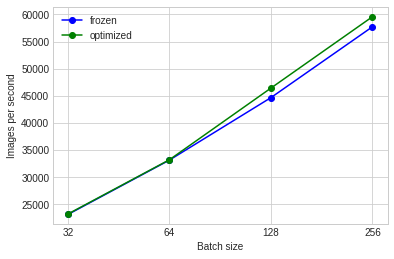

In [73]:
x2=[3, 4, 5, 6]
my_xticks = ['32', '64', '128', '256']

plt.figure()
plt.plot(x2, times_frozen[3:,2], marker='o', color='blue', label='frozen')
plt.plot(x2, times_optimized[3:,2], marker='o', color='green', label='optimized')
plt.legend()
plt.ylabel('Images per second')
plt.xlabel('Batch size')
plt.xticks(x2, my_xticks)

In [74]:
! nvidia-smi

Thu Dec  5 16:20:07 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    27W /  75W |    899MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  